In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

# Preparing Dataset

In [8]:
dataset_path = '/content/drive/MyDrive/datasets/7-7-faces'
width = height = 224

image_data_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    validation_split=0.1
)

train_data = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(width, height),
    subset='training',
    shuffle=True,
    batch_size=32
)

validation_data = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(width, height),
    subset='validation',
    shuffle=False,
    batch_size=32
)


Found 1227 images belonging to 14 classes.
Found 131 images belonging to 14 classes.


# Creat Model

In [12]:
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(width, height, 3),
    pooling='avg'
)

9406464/9406464 [==============================] - 2s 0us/step


In [13]:
for layer in base_model.layers[0:-4]:
  layer.trainable = False

In [17]:
model = Sequential([
    base_model,
    layers.Dense(14, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 dense (Dense)               (None, 14)                17934     
                                                                 
Total params: 2275918 (8.68 MB)
Trainable params: 430094 (1.64 MB)
Non-trainable params: 1845824 (7.04 MB)
_________________________________________________________________


In [21]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

In [22]:
history = model.fit(train_data,
          validation_data=validation_data,
          epochs=32)

Epoch 1/32
39/39 [==============================] - 1181s 30s/step - loss: 1.7020 - accuracy: 0.5216 - val_loss: 1.3269 - val_accuracy: 0.6260
Epoch 2/32
39/39 [==============================] - 14s 346ms/step - loss: 0.8173 - accuracy: 0.8256 - val_loss: 1.0011 - val_accuracy: 0.6794
Epoch 3/32
39/39 [==============================] - 14s 352ms/step - loss: 0.5203 - accuracy: 0.8965 - val_loss: 0.8133 - val_accuracy: 0.7405
Epoch 4/32
39/39 [==============================] - 14s 360ms/step - loss: 0.3717 - accuracy: 0.9267 - val_loss: 0.7684 - val_accuracy: 0.7405
Epoch 5/32
39/39 [==============================] - 14s 351ms/step - loss: 0.2696 - accuracy: 0.9609 - val_loss: 0.7220 - val_accuracy: 0.7634
Epoch 6/32
39/39 [==============================] - 14s 350ms/step - loss: 0.2134 - accuracy: 0.9658 - val_loss: 0.7082 - val_accuracy: 0.7786
Epoch 7/32
39/39 [==============================] - 14s 350ms/step - loss: 0.1628 - accuracy: 0.9821 - val_loss: 0.6712 - val_accuracy: 0.7939

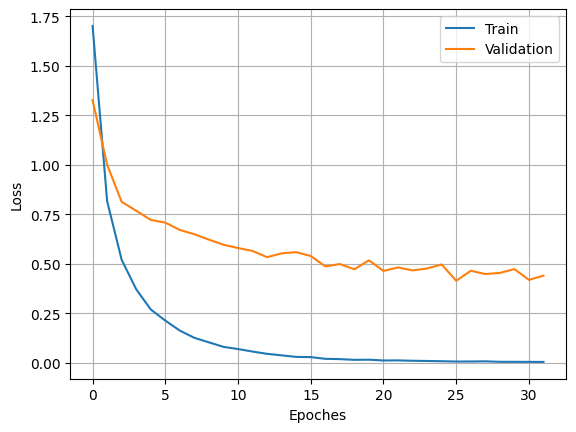

In [24]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

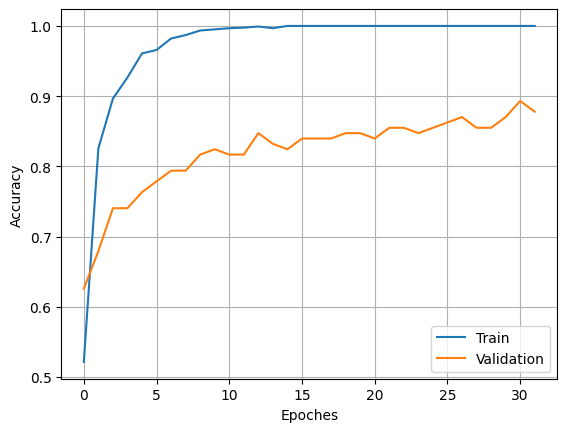

In [26]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [27]:
model.save('/content/drive/MyDrive/PyLearn 7 Course/54.TransferLearning/7_7_Faces_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
